<H2><b>STATISTICAL ANALYSIS OF FINANCIAL DATA </H2></b>
<H4><b>Inspired by a WBL Course Taught at the Zurich University of Applied Sciences by Dr Marcel Dettling</H4>
<p></b>
----------------------------------------------------------------------------------------------------------------
<H5><i>Run this notebook in a jupyter environment, when prompted to- select a stock for analysis by entering it's ticker symbol and the notebook will analyse it for you</H5></i>
<hr size="8" noshade>

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import pandas_datareader as pdr
from pandas_datareader import data as web
import yfinance as yf
from pandas import Series, DataFrame
import datetime as dt
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

<h3><b> Step 1 </h3> </b>
<hr align="left" width="30%" size= "0.2" >
<p>
<H4>Extracting Data</h4>



In [2]:
stock = input("Enter the ticker symbol of the stock you want analysed: ")
print(stock)

GOOGL


In [3]:
start = dt.datetime(2022,1,1)
end =dt.datetime.today()
print(start)
print(end)

2022-01-01 00:00:00
2023-08-20 13:09:45.740856


In [4]:

from yahoofinancials import YahooFinancials

my_data = yf.download(stock, start=start, end=end, progress=False)
#df= web.DataReader(stock, 'yahoo', start, end)
df=pd.DataFrame(my_data)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,145.054993,145.850998,143.712997,144.991501,144.991501,28646000
2022-01-04,145.395996,146.485001,143.716507,144.399506,144.399506,28400000
2022-01-05,144.419998,144.499496,137.688004,137.774994,137.774994,54618000
2022-01-06,136.998505,139.940002,136.558502,137.747498,137.747498,37348000
2022-01-07,138.145493,138.448502,135.766495,137.016998,137.016998,29760000


<h3><b> Step 2 </h3> </b>
<hr align="left" width="30%" size= "0.2" >
<p>
<H4>Pre-Processing</h4>


In [5]:
df.shape

(409, 6)

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,409.000000,409.000000,409.000000,409.000000,409.000000,4.090000e+02
mean,112.838362,114.421215,111.379137,112.875166,112.875166,3.506776e+07
std,15.552201,15.588262,15.278551,15.376605,15.376605,1.374608e+07
min,85.400002,86.519997,83.339996,83.430000,83.430000,9.701400e+06
25%,99.430000,101.040001,98.040001,99.970001,99.970001,2.632920e+07
50%,112.370003,114.195999,110.872498,112.316498,112.316498,3.199960e+07
75%,124.599998,125.970001,122.739998,124.540001,124.540001,3.990000e+07
max,151.250000,151.546494,145.522507,148.000000,148.000000,1.232000e+08


In [7]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df.corr

<bound method DataFrame.corr of                   Open        High         Low       Close   Adj Close   
Date                                                                     
2022-01-03  145.054993  145.850998  143.712997  144.991501  144.991501  \
2022-01-04  145.395996  146.485001  143.716507  144.399506  144.399506   
2022-01-05  144.419998  144.499496  137.688004  137.774994  137.774994   
2022-01-06  136.998505  139.940002  136.558502  137.747498  137.747498   
2022-01-07  138.145493  138.448502  135.766495  137.016998  137.016998   
...                ...         ...         ...         ...         ...   
2023-08-14  129.389999  131.369995  128.960007  131.330002  131.330002   
2023-08-15  131.100006  131.419998  129.279999  129.779999  129.779999   
2023-08-16  128.699997  130.279999  127.870003  128.699997  128.699997   
2023-08-17  129.800003  131.990005  129.289993  129.919998  129.919998   
2023-08-18  128.509995  129.250000  126.379997  127.459999  127.459999   

     

<h3><b> Step 3 </h3> </b>
<hr align="left" width="30%" size= "0.2" >
<p>
<H4>Creating Visualisations</h4>


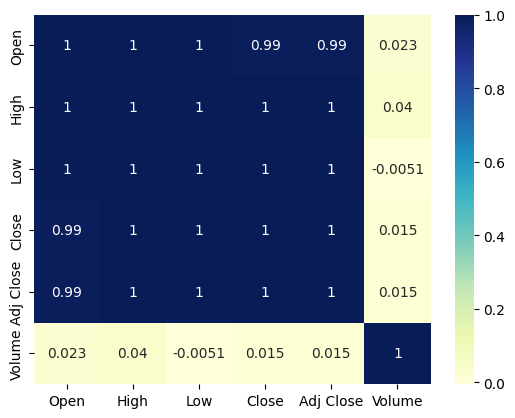

In [9]:
corr=df.corr()
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True)

<Axes: >

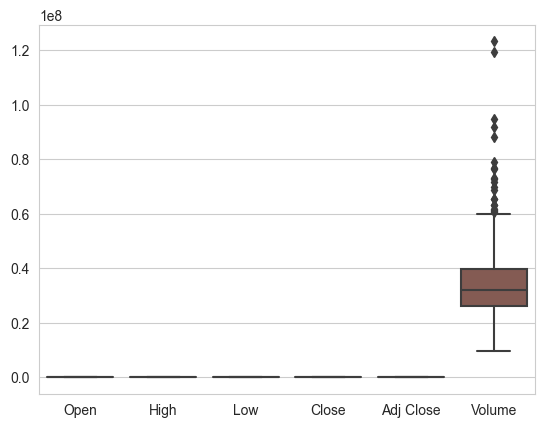

In [10]:
sns.set_style("whitegrid")
  
sns.boxplot( data = df)

<Figure size 2400x1200 with 0 Axes>

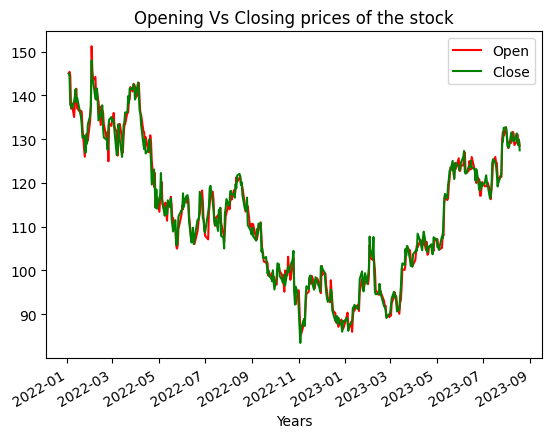

In [11]:
plt.style.use('default')
plt.figure(figsize=(16, 8), dpi=150)
viz=df[["Open","Close"]]
viz.plot(label='Stock', color=['Red', 'green'])
plt.title('Opening Vs Closing prices of the stock')
  
# adding label to x-axis
plt.xlabel('Years')
  
# adding legend.
plt.legend()

In [12]:
df.Close

Date
2022-01-03    144.991501
2022-01-04    144.399506
2022-01-05    137.774994
2022-01-06    137.747498
2022-01-07    137.016998
                 ...    
2023-08-14    131.330002
2023-08-15    129.779999
2023-08-16    128.699997
2023-08-17    129.919998
2023-08-18    127.459999
Name: Close, Length: 409, dtype: float64

In [13]:

df.index = pd.to_datetime(df.index)

# Filter the DataFrame for March 2020
march_2022_df = df[(df.index.year == 2022) & (df.index.month == 3)]


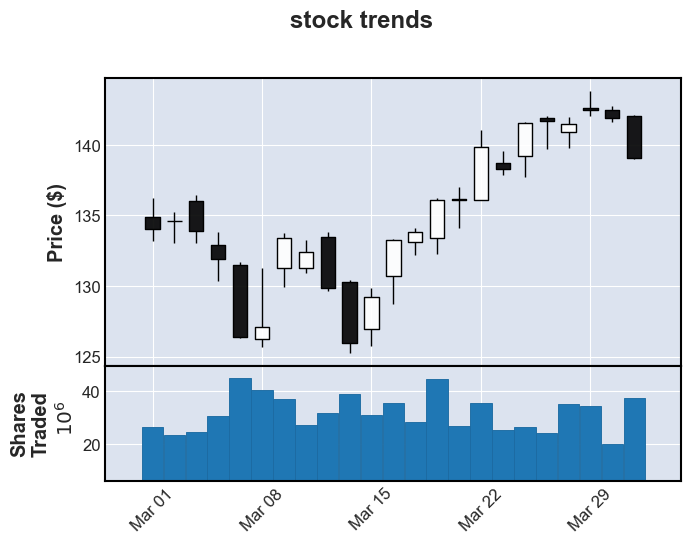

In [45]:
import mplfinance as fplt
fplt.plot(
            march_2022_df,
            type='candle',
            title='stock trends',
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Shares\nTraded'

        )
    # Candlestick charts are used to identify trends, reversals, and 
    # patterns in price movements. They provide insights into the relationship between 
    # opening and closing prices, as well as the overall range of 
    # prices within a specific time frame.

# 1. Each candlestick consists of a rectangular body and two lines extending from it, called "wicks" or "shadows."
# 2. The top of the rectangular body represents the closing price.
# 3. The bottom of the rectangular body represents the opening price.
# 4. The top wick extends from the top of the body to the highest price (high) during the period.
# 5. The bottom wick extends from the bottom of the body to the lowest price (low) during the period.
# 6. The color of the body (often green or white for bullish periods and red or black for bearish periods) 
#    indicates whether the closing price was higher or lower than the opening price.

In [15]:
import plotly
print("plotly Version : {}".format(plotly.__version__))

plotly Version : 5.15.0


In [16]:
import plotly.graph_objects as go

candlestick = go.Candlestick(
                            x=df.index,
                            open=df['Open'],
                            high=df['High'],
                            low=df['Low'],
                            close=df['Close']
                            )

fig = go.Figure(data=[candlestick])

from dash import Dash, dcc, html

app = Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter


<h3><b> Step 4 </h3> </b>
<hr align="left" width="30%" size= "0.2" >
<p>
<H4>Statistical Analysis</h4>


In [46]:
# Descriptive analysis of Log Returns

df['retlog']=np.log(df['Adj Close'].astype('float64')/df['Adj Close'].astype('float64').shift(1))
df.head()
# log returns for adjusted closing prices

,Open,High,Low,Close,Adj Close,Volume,retlog
Date,,,,,,,
2022-01-03,145.054993,145.850998,143.712997,144.991501,144.991501,28646000,NaN
2022-01-04,145.395996,146.485001,143.716507,144.399506,144.399506,28400000,-0.004091
2022-01-05,144.419998,144.499496,137.688004,137.774994,137.774994,54618000,-0.046962
2022-01-06,136.998505,139.940002,136.558502,137.747498,137.747498,37348000,-0.000200
2022-01-07,138.145493,138.448502,135.766495,137.016998,137.016998,29760000,-0.005317


In [47]:
#filling na values

df['retlog'] = df['retlog'].fillna(method = 'bfill')
df.head()

,Open,High,Low,Close,Adj Close,Volume,retlog
Date,,,,,,,
2022-01-03,145.054993,145.850998,143.712997,144.991501,144.991501,28646000,-0.004091
2022-01-04,145.395996,146.485001,143.716507,144.399506,144.399506,28400000,-0.004091
2022-01-05,144.419998,144.499496,137.688004,137.774994,137.774994,54618000,-0.046962
2022-01-06,136.998505,139.940002,136.558502,137.747498,137.747498,37348000,-0.000200
2022-01-07,138.145493,138.448502,135.766495,137.016998,137.016998,29760000,-0.005317


In [54]:
import scipy.stats as scs

# Obtaining range of the plot
plot_range = np.linspace(min(df['retlog']), max(df['retlog']), num=10000 )

# Obtaining the mean
mean = df['retlog'].mean()

# Obtaining the standard deviation
standard_dev = df['retlog'].std()

# Obtaining the probability distribution function of the log returns series
pdf_series = scs.norm.pdf(plot_range, loc=mean, scale=standard_dev)

# Printing mu and sigma
print("Mean of log returns:",mean)
print("Standard Deviation of log returns:", standard_dev)

Mean of log returns: -0.00032509502780725684
Standard Deviation of log returns: 0.022918842912112918


C:\Users\HP\AppData\Local\Temp\ipykernel_12756\2314449501.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Q-Q plot')

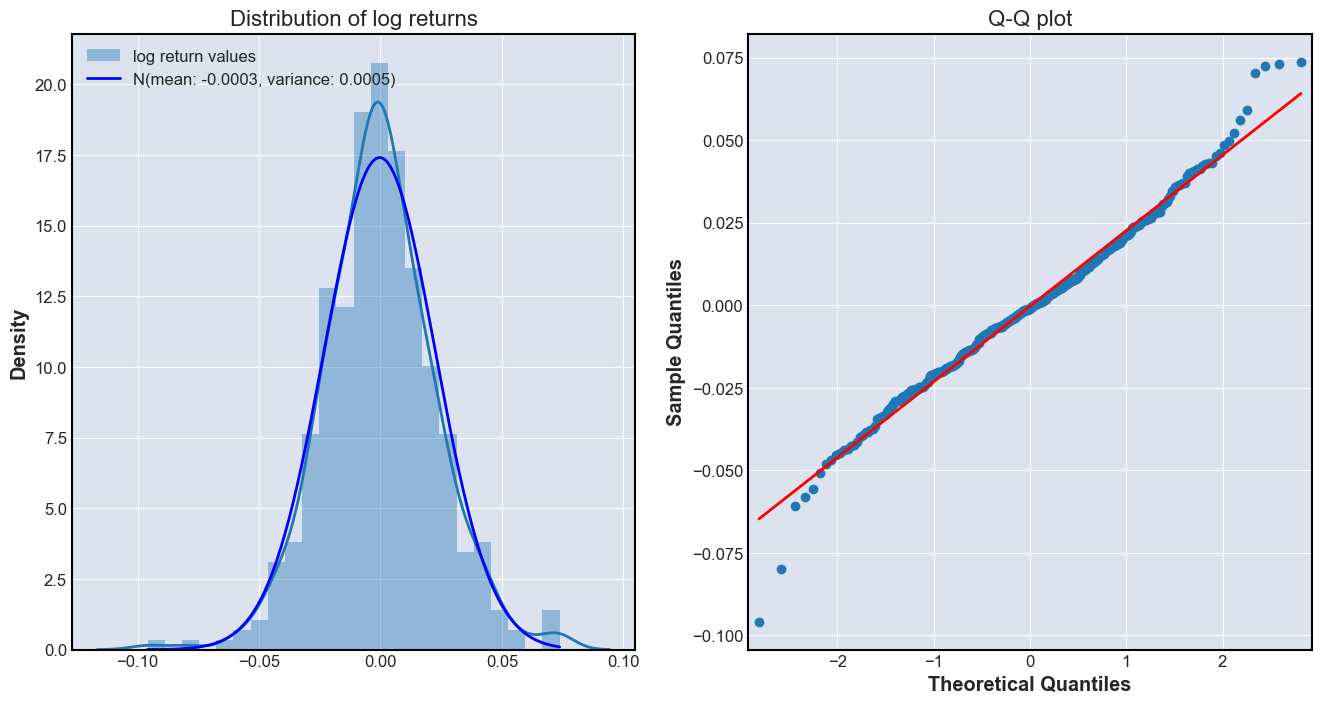

In [71]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.distplot(df['retlog'].values, kde=True, norm_hist=True, ax=ax[0], label='log return values')
ax[0].set_title('Distribution of log returns', fontsize=16)
ax[0].plot(plot_range, pdf_series, 'b', lw=2,
 label=f'N(mean: {mean:.4f}, variance: {standard_dev**2:.4f})')
ax[0].legend(loc='upper left')

# Subplot 2
# Obtaining Q-Q plot using qqplot function of statsmodels.api library
qq = sm.qqplot(df['retlog'].values, line='s', ax=ax[1])
#setting title and fontsize of the second plot
ax[1].set_title('Q-Q plot', fontsize = 16)

Observations-
1. log returns are normalised and symmetry is seen along 0.

Next Steps-
1. Conduct Risk metrics tests like Value-at-Risk (VaR) and Conditional Value-at-Risk (CVaR) using log returns

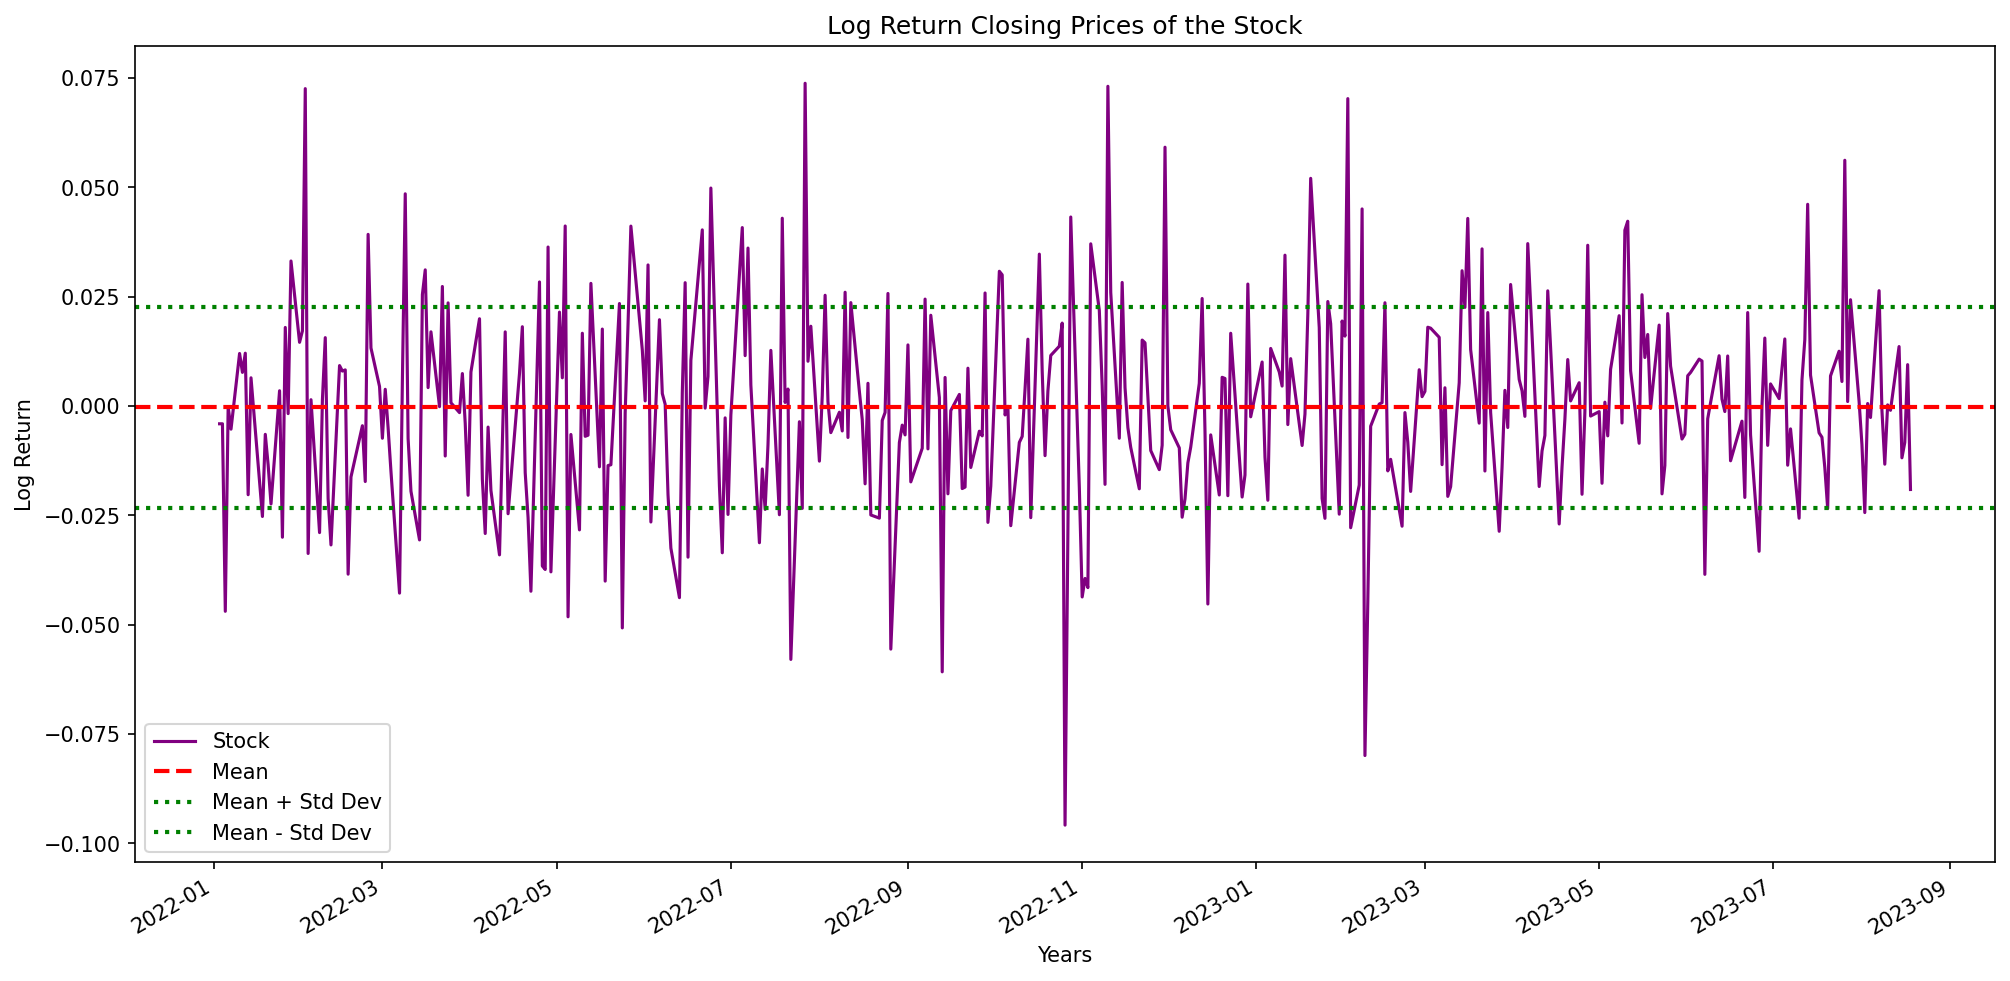

In [73]:

mean = viz.mean()
variance = viz.var()

# Create the plot
plt.style.use('default')
plt.figure(figsize=(16, 8), dpi=150)

# Plot the log return values
viz.plot(label='Stock', color=['purple'])

# Add lines for mean and variance
plt.axhline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axhline(mean + variance**0.5, color='green', linestyle='dotted', linewidth=2, label='Mean + Std Dev')
plt.axhline(mean - variance**0.5, color='green', linestyle='dotted', linewidth=2, label='Mean - Std Dev')

# Adding title and labels
plt.title('Log Return Closing Prices of the Stock')
plt.xlabel('Years')
plt.ylabel('Log Return')
  
# Adding legend
plt.legend()

# Show the plot
plt.show()

Observation-
1. Weak stationarity is observed in log returns

next steps-
1. Assessing stationarity often involves conducting formal tests, such as the Augmented Dickey-Fuller (ADF) test or the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for confirmation

The Autocorrelation plot for the data is:


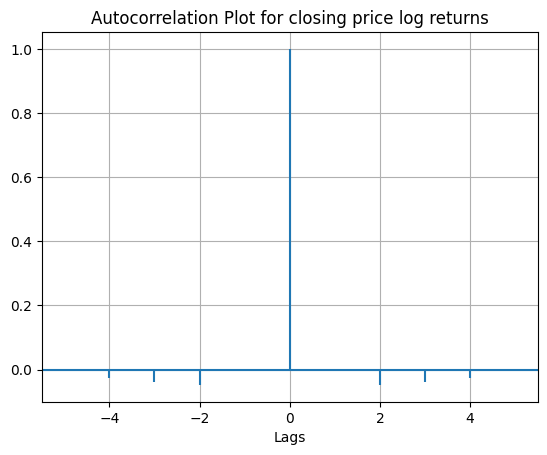

In [22]:
# more plots for better analysis of log returns for closing prices

plt.title("Autocorrelation Plot for closing price log returns")
 
# Providing x-axis name.
plt.xlabel("Lags")
 
# Plotting the Autocorrelation plot.
plt.acorr(df['retlog'], maxlags = 5)
 
# Displaying the plot.
print("The Autocorrelation plot for the data is:")
plt.grid(True)
 
plt.show()

Seasonality observerved for log returns of closing price

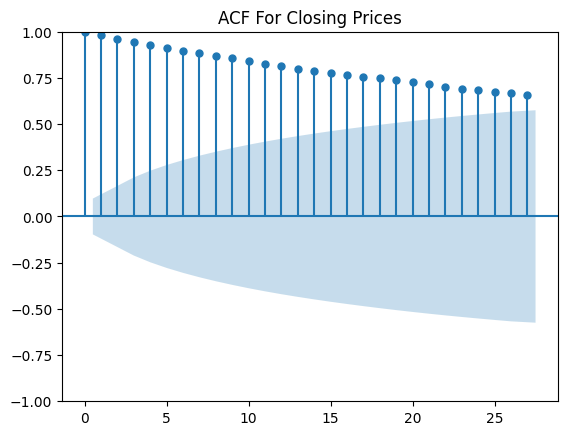

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df["Close"])
plt.title("ACF For Closing Prices")
plt.show()

Autoregressive component is likely indicated in Closing Prices

The Autocorrelation plot for the data is:


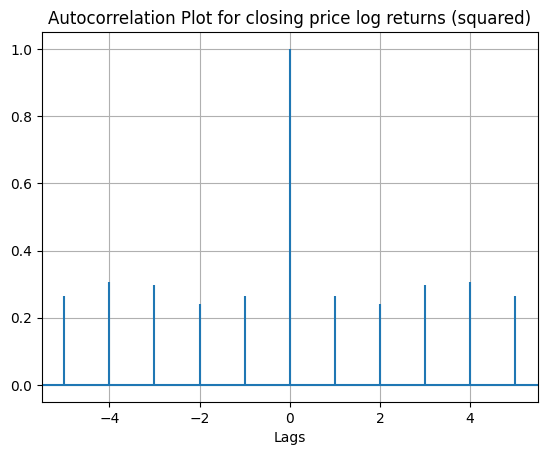

In [24]:
plt.title("Autocorrelation Plot for closing price log returns (squared)")
 
# Providing x-axis name.
plt.xlabel("Lags")

log_ret_square=np.square(df["retlog"])
 
# Plotting the Autocorrelation plot.
plt.acorr(log_ret_square, maxlags = 5)
 
# Displaying the plot.
print("The Autocorrelation plot for the data is:")
plt.grid(True)
 
plt.show()

In [25]:
from scipy.stats import skew
from scipy.stats import kurtosis
print(skew(df["retlog"]))
print(kurtosis(df["retlog"]))

0.03503476538416216
1.210265118368767


In [39]:
# jarque-Bera Test (testing normality)
dist = stats.chi2(df=5)
res = stats.jarque_bera(df["retlog"])

print("Jarque-Bera statistic:", res[0])
print("p-value:", f'{res[1]:.10f}')


Jarque-Bera statistic: 25.045309204826825
p-value: 0.0000036432


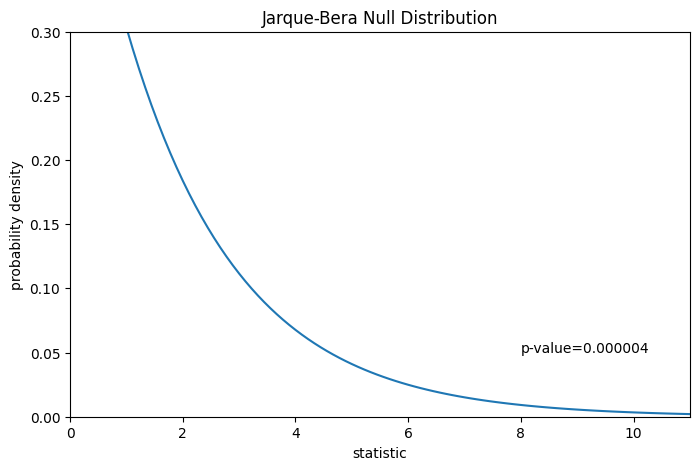

In [42]:
dist = stats.chi2(df=2)
jb_val = np.linspace(0, 11, 100)
pdf = dist.pdf(jb_val)
fig, ax = plt.subplots(figsize=(8, 5))
def jb_plot(ax):  # we'll re-use this
    ax.plot(jb_val, pdf)
    ax.set_title("Jarque-Bera Null Distribution")
    ax.set_xlabel("statistic")
    ax.set_ylabel("probability density")

jb_plot(ax)
pvalue = res[1]
annotation = (f'p-value={pvalue:.6f}')
props = dict(facecolor='black', width=1, headwidth=5, headlength=8)
ax.annotate(annotation, (7.5, 0.01), (8, 0.05))
i = jb_val >= res.statistic  # indices of more extreme statistic values
ax.fill_between(jb_val[i], y1=0, y2=pdf[i])
ax.set_xlim(0, 11)
ax.set_ylim(0, 0.3)
plt.show()